In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train = pd.read_csv('application_train.csv', sep=',')
df_test = pd.read_csv('application_test.csv', sep=',')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# Первичный анализ данных

In [4]:
print('Train dataset shape: ', df_train.shape)
print('Test dataset shape: ', df_test.shape)

Train dataset shape:  (307511, 122)
Test dataset shape:  (48744, 121)


In [5]:
df_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#рассмотрим столбцы по типам даных, которые в них хранятся
df_train.info(max_cols=122)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# EDA

## Распределение TARGET

In [9]:
df_train.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

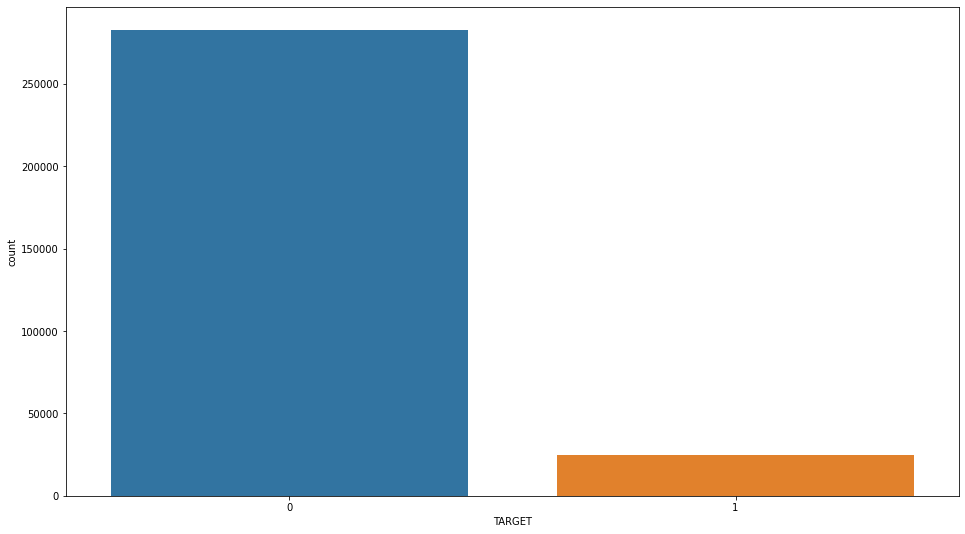

In [10]:
plt.figure(figsize = (16, 9))
sns.countplot(df_train.TARGET)

In [11]:
df_train.TARGET.value_counts(1)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

Видим что проблемы с возвратом имеют приблизительно 8.8% с выборки, так же видно что классы не сбалансированы.

## Недостающие данные

In [12]:
def dataset_missing_vals(x):
    # поиск недостающих данных в датафрейме
    missing_values = x.isnull().sum().sort_values(ascending=False)
    # соотношение недостающих данных к общему количеству
    missing_values_perc = 100 * missing_values/len(x)
    concat_values = pd.concat([missing_values, missing_values_perc.round(1)],axis=1)
    concat_values.columns = ['Недостающие данные','Процентное отношение к общему количеству']
    return concat_values[concat_values.iloc[:,1]!=0]

In [13]:
dataset_missing_vals(df_train).head(60)

,Недостающие данные,Процентное отношение к общему количеству
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MEDI,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4


In [14]:
dataset_missing_vals(df_test).head(60)

,Недостающие данные,Процентное отношение к общему количеству
COMMONAREA_AVG,33495,68.7
COMMONAREA_MODE,33495,68.7
COMMONAREA_MEDI,33495,68.7
NONLIVINGAPARTMENTS_AVG,33347,68.4
NONLIVINGAPARTMENTS_MODE,33347,68.4
NONLIVINGAPARTMENTS_MEDI,33347,68.4
FONDKAPREMONT_MODE,32797,67.3
LIVINGAPARTMENTS_AVG,32780,67.2
LIVINGAPARTMENTS_MODE,32780,67.2
LIVINGAPARTMENTS_MEDI,32780,67.2


Столбцы с большими количествами данных можно заполнить нулями или медианными значениями, или же удалить их, однако т.к. мы не знаем их влияние на значение таргета, нельзя определить какие оставить, а какие дропнуть

## Типы данных в столбцах

In [15]:
print("Train выборка:\n{}".format(df_train.dtypes.value_counts()))
print("\nTest выборка:\n{}".format(df_test.dtypes.value_counts()))

Train выборка:
float64    65
int64      41
object     16
dtype: int64

Test выборка:
float64    65
int64      40
object     16
dtype: int64


## Выбор фич

In [16]:
# для оставления всех ничего не раскоментировать
# для оставления только наиболее коррелирующих (см. корреляция) раскоментировать это:
#df_train = df_train.drop(df_train.columns.difference(['DAYS_BIRTH', 'TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'SK_ID_CURR']), axis=1)
#df_test =df_test.drop(df_test.columns.difference(['DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'SK_ID_CURR']), axis=1)
# для оставления только наиболее коррелирующих и незначительных (см. корреляция) раскоментировать это:
#df_train=df_train.drop(df_train.columns.difference(['DAYS_BIRTH', 'TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
#                                          'CODE_GENDER', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE',
#                                          'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'SK_ID_CURR']), axis=1)
#df_test=df_test.drop(df_test.columns.difference(['DAYS_BIRTH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
#                                          'CODE_GENDER', 'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE',
#                                          'NAME_INCOME_TYPE', 'ORGANIZATION_TYPE', 'SK_ID_CURR']), axis=1)
#При проведении полного анализа данных следующие фичи обозначили себя как наиболее коррелирующие с таргетом:
#        - EXT_SOURCE_{1,2,3}
#        - DAYS_BIRTH
#        - CODE_GENDER
#        - DAYS_EMPLOYED
#        - OCCUPATION
#        - EDUCATION
#        - INCOME
#        - ORGANIZATION

## Кодирование категориальных данных

In [17]:
df_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [18]:
df_train = pd.get_dummies(df_train,drop_first=True)
df_test = pd.get_dummies(df_test,drop_first=True)
print('Train dataset shape: ', df_train.shape)
print('Test dataset shape: ', df_test.shape)

Train dataset shape:  (307511, 230)
Test dataset shape:  (48744, 226)


In [19]:
#выравниваем датасеты по столбцам
target = df_train['TARGET']
df_train, df_test = df_train.align(df_test, join = 'inner', axis = 1)
print('Train dataset shape: ', df_train.shape)
print('Test dataset shape: ', df_test.shape)
df_train['TARGET'] = target
print('Train dataset shape: ', df_train.shape)
print('Test dataset shape: ', df_test.shape)

Train dataset shape:  (307511, 226)
Test dataset shape:  (48744, 226)
Train dataset shape:  (307511, 227)
Test dataset shape:  (48744, 226)


## Проблемы с DAYS_EMPLOYED
Показатель этой фичи относительный к последнему щайму, поэтому могут возникнуть проблемы с этими данными, рассмотрим их:

In [20]:
(df_train['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

Видим максимальное значение в 1000 лет, чего не может быть, рассмотрим распределение на графике и определим количество таких клиентов:

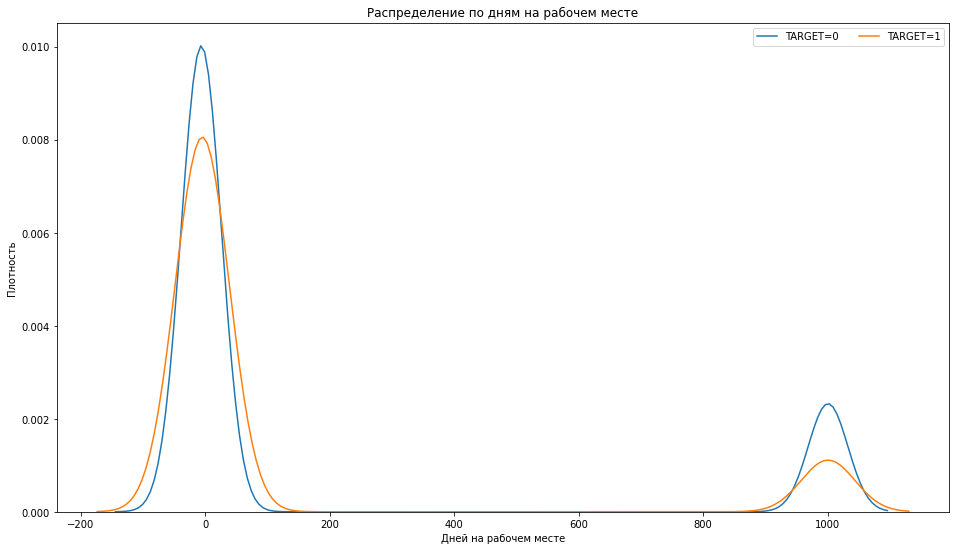

In [21]:
# распределение по опыту работы
plt.figure(figsize=(16,9))
# качественные займы
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_EMPLOYED'] / 365)
# проблемные займы
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_EMPLOYED'] / 365)
plt.xlabel('Дней на рабочем месте')
plt.ylabel('Плотность')
plt.title('Распределение по дням на рабочем месте')
plt.legend(['TARGET=0', 'TARGET=1'], ncol=2, loc='upper right')

In [22]:
anomalies = df_train[(df_train['DAYS_EMPLOYED']/365>=800) & (df_train['DAYS_EMPLOYED']/365<=1200)]
len(anomalies)

55374

<AxesSubplot:xlabel='TARGET', ylabel='count'>

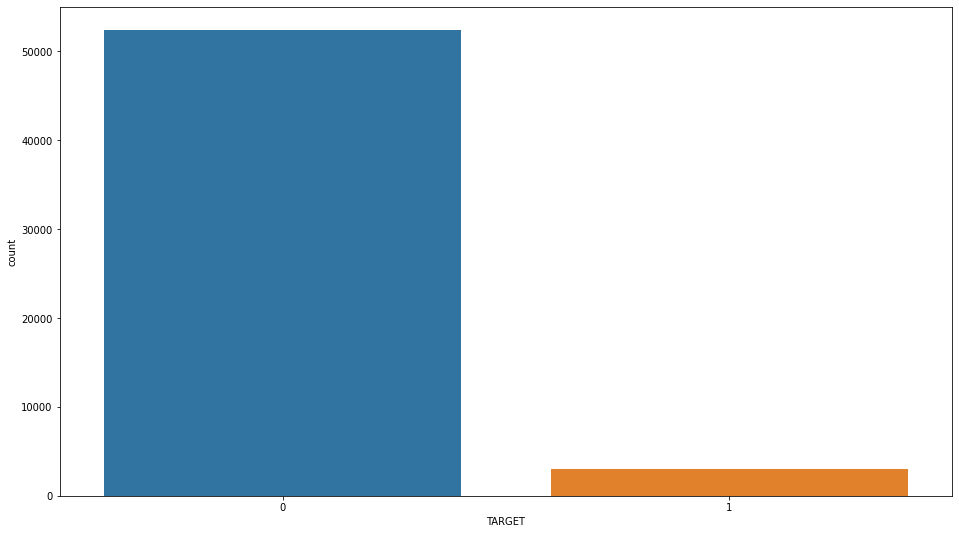

In [23]:
plt.figure(figsize = (16, 9))
sns.countplot(x='TARGET',data=anomalies)

Видим что качественных займов большое и в соотношении выше чем у неаномальных, пожтому можем смержить с неаномальными заимщиками

Text(0.5, 0, 'Years worked before application')

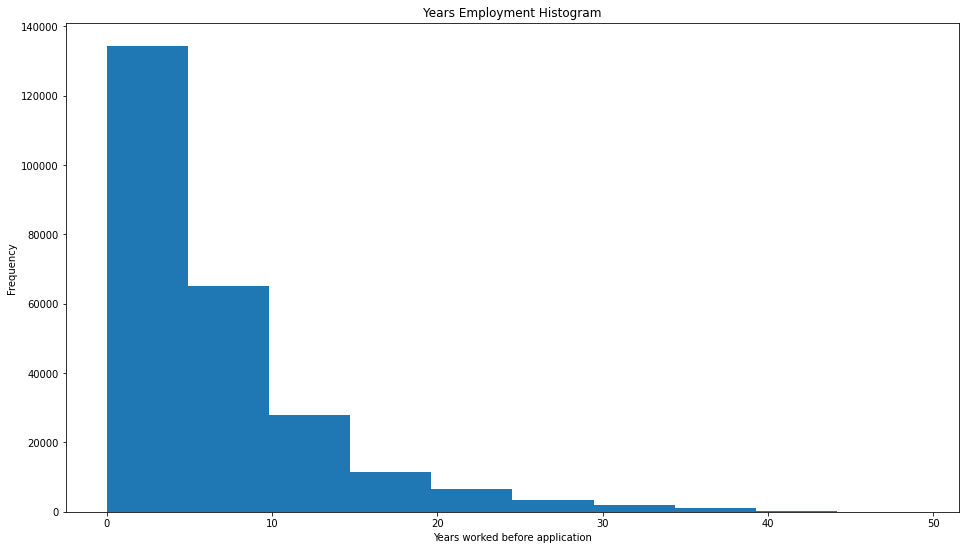

In [24]:
df_train['DAYS_EMPLOYED_ANOM'] = df_train["DAYS_EMPLOYED"] == 365243

df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].replace({365243: np.nan})
#график по годам занятости у аномалий
plt.figure(figsize=(16,9))
(df_train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Years Employment Histogram')
plt.xlabel("Years worked before application")

In [25]:
# Create an anomalous flag column
df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].replace({365243: np.nan})

## Корреляция данных

Расчитаем коефициенты кореляции Пирсона относительно TARGET

In [26]:
correlations = df_train.corr()['TARGET'].sort_values()

In [27]:
# Отображение
print('Наивысшая позитивная корреляция:\n')
print(correlations.tail(40))
print('\nНаивысшая негативная коррелация:\n')
print(correlations.head(10))

Наивысшая позитивная корреляция:

OBS_30_CNT_SOCIAL_CIRCLE                             0.009131
CNT_FAM_MEMBERS                                      0.009308
ORGANIZATION_TYPE_Industry: type 3                   0.009691
ORGANIZATION_TYPE_Restaurant                         0.010266
NAME_EDUCATION_TYPE_Lower secondary                  0.011747
OCCUPATION_TYPE_Cooking staff                        0.012222
OCCUPATION_TYPE_Security staff                       0.014648
ORGANIZATION_TYPE_Transport: type 3                  0.017552
CNT_CHILDREN                                         0.019187
OCCUPATION_TYPE_Sales staff                          0.019537
NAME_HOUSING_TYPE_Rented apartment                   0.019767
ORGANIZATION_TYPE_Construction                       0.019792
AMT_REQ_CREDIT_BUREAU_YEAR                           0.019930
ORGANIZATION_TYPE_Business Entity Type 3             0.023993
NAME_FAMILY_STATUS_Single / not married              0.026518
OCCUPATION_TYPE_Low-skill Laborers  

### Исследуем корреляцию этих данных и преобразуем полиномиальные признаки

### Распределение займов по возрасту

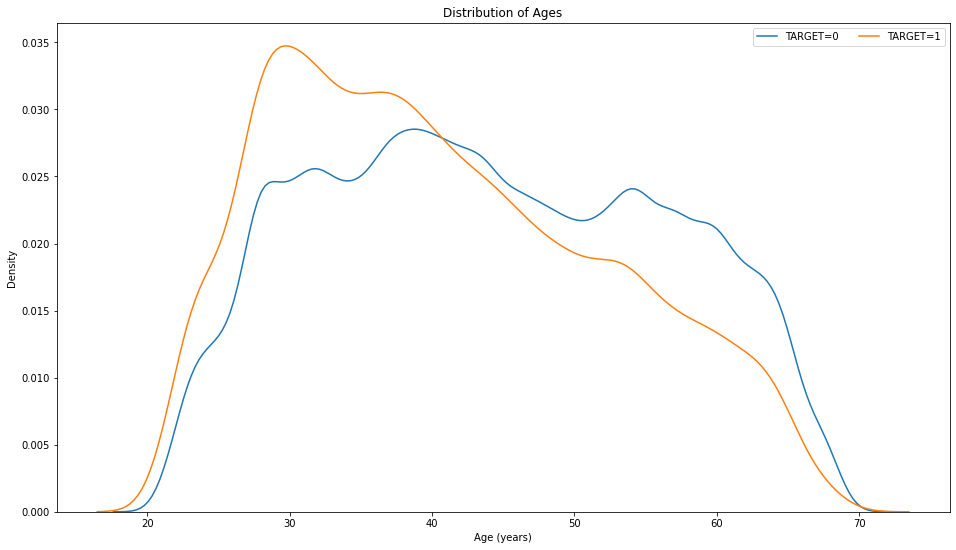

In [28]:
df_train['DAYS_BIRTH'] = abs(df_train['DAYS_BIRTH'])
df_train['DAYS_BIRTH'].corr(df_train['TARGET'])
plt.figure(figsize = (16, 9))
# займы выплаченые вовремя
sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365)

# проблемные займы
sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365)

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');
plt.legend(['TARGET=0', 'TARGET=1'], ncol=2, loc='upper right')

Видим, что доля невозвратов больше для более молодых людей и снижается с увеличением возраста

### Распрделение по внешним источникам

In [29]:
ext_data = df_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
TARGET,1.000000,-0.155317,-0.160472,-0.178919
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000


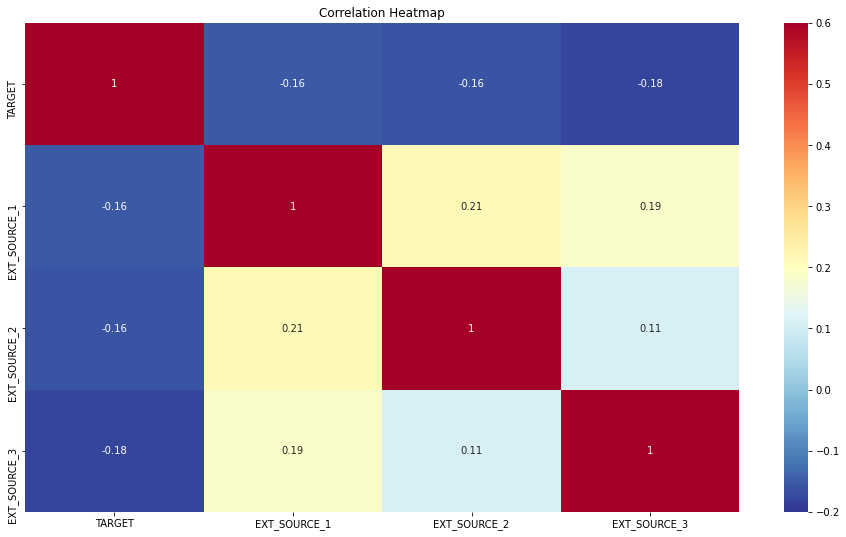

In [30]:
plt.figure(figsize = (16, 9))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.2, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Bидим что кореляция всех источников с таргетом негативная

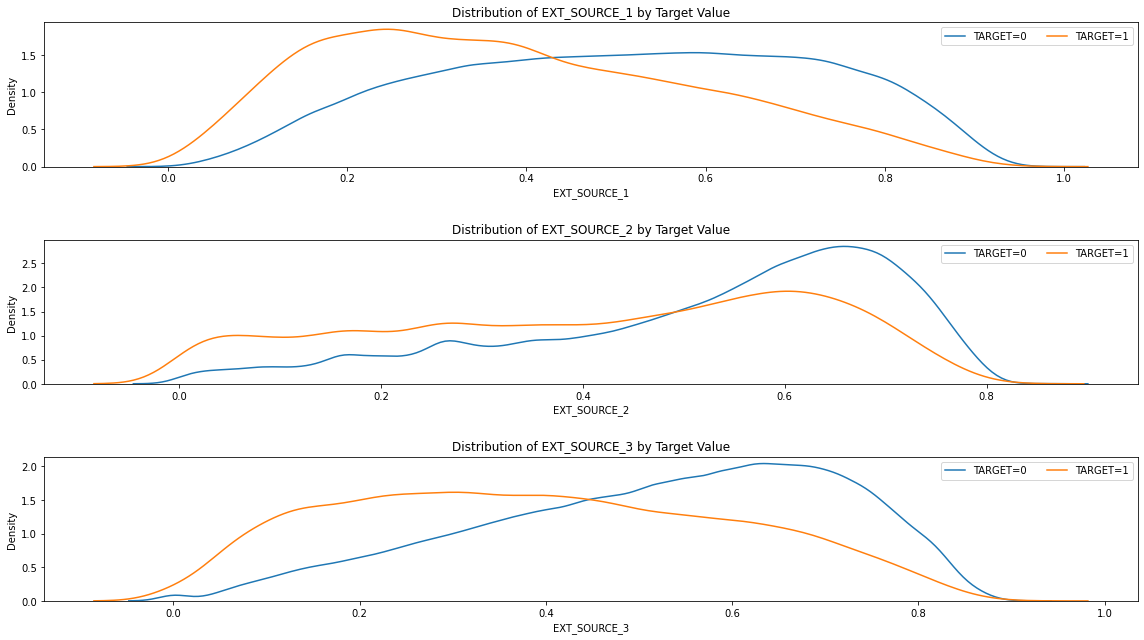

In [31]:
plt.figure(figsize = (16, 9))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    # качественные займы
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 0, source], label = 'target == 0')
    # проблемные займы
    sns.kdeplot(df_train.loc[df_train['TARGET'] == 1, source], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    plt.legend(['TARGET=0', 'TARGET=1'], ncol=2, loc='upper right')
    
plt.tight_layout(h_pad = 2.5)

Видим что с ростом показателя растет и вероятность возврата займа

Исследуем незначительные фичи

In [32]:
# создание новых переменных для исследования кореляции других признаков, т.к. категориальные признаки в основных датафреймах
# преобразованы
df_train_eda = pd.read_csv('application_train.csv', sep=',')
df_test_eda = pd.read_csv('application_test.csv', sep=',')

In [33]:
# функция для ускорения однотипных исследований
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_train_eda[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Количество займов': temp.values})

    cat_perc = df_train_eda[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("colorblind")
    s = sns.barplot(ax=ax1, x = feature, y="Количество займов",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Соотношение проблемных', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

## Пол клиента

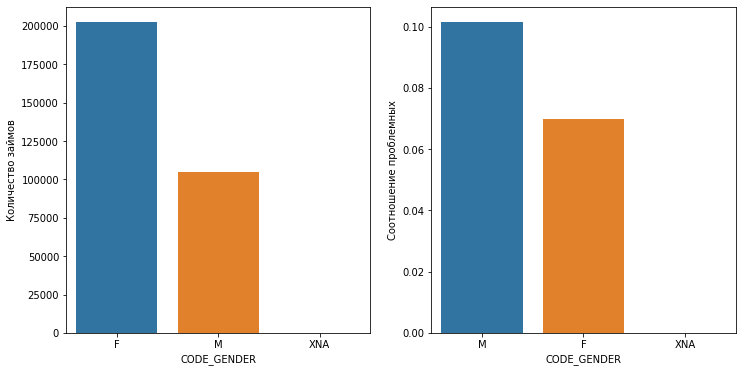

In [34]:
plot_stats('CODE_GENDER')

Мужчи вдвое меньше чем женщин, однако риск их займов гораздо выше

## Bид деятельности

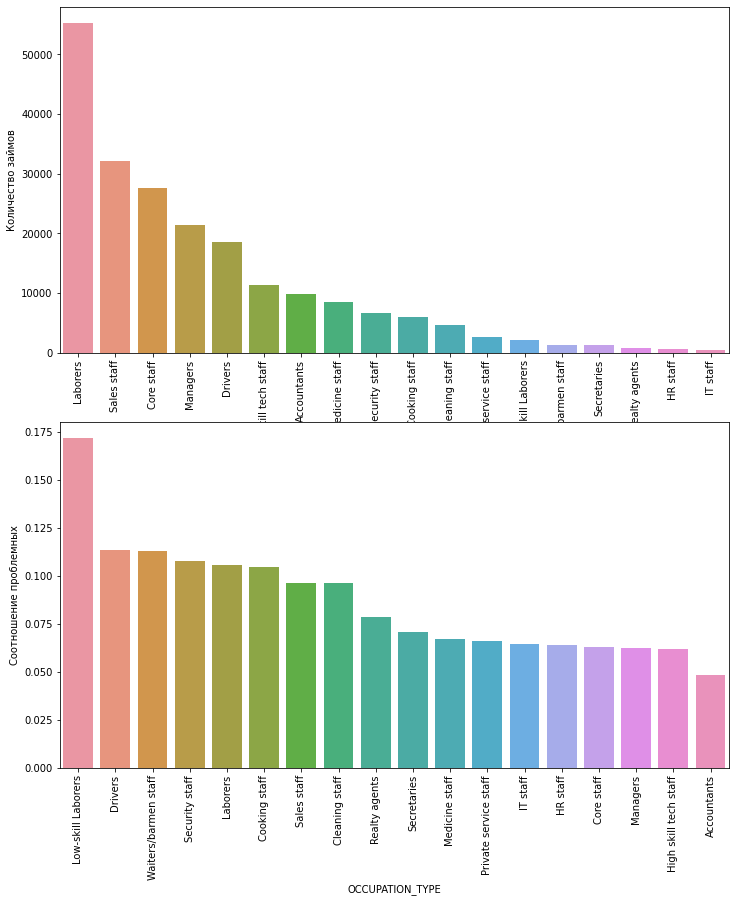

In [35]:
plot_stats('OCCUPATION_TYPE',True, False)

B соотношении количества к риску - наиболее невыгодно давать займ водителям и охранникам

## Образование

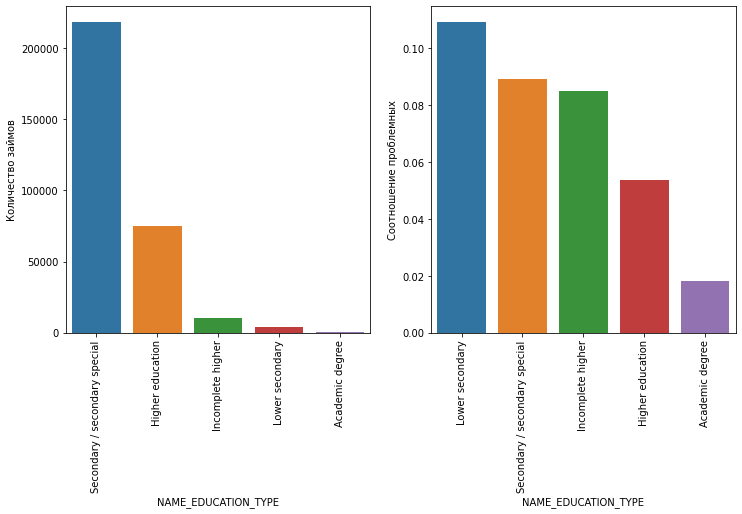

In [36]:
plot_stats('NAME_EDUCATION_TYPE',True)

Наиболее невыгодные - lower secondary, secondary

## Тип дохода

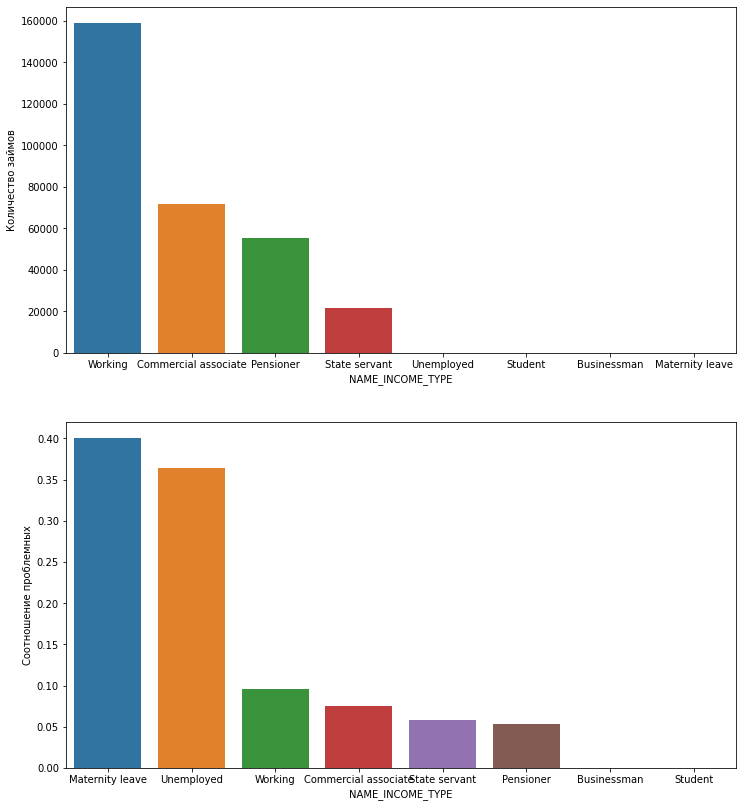

In [37]:
plot_stats('NAME_INCOME_TYPE',False,False)

Матери в декрете и безработные - самая рисковая группа

## Тип организации

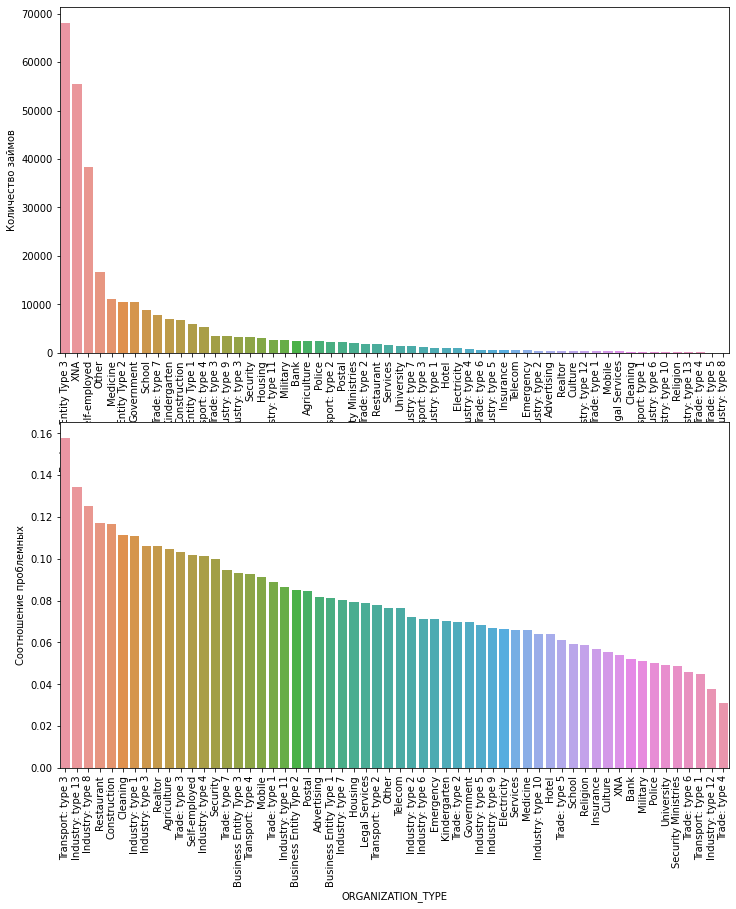

In [38]:
plot_stats('ORGANIZATION_TYPE',True, False)

In [39]:
# заполняем недостающие данные для фич с наибольшей корреляцией
from sklearn.impute import SimpleImputer
poly_features = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1','DAYS_BIRTH']
imputer = SimpleImputer(strategy='median')
df_train[poly_features] = imputer.fit_transform(df_train[poly_features])
df_train[poly_features].shape

(307511, 4)

In [40]:
df_test[poly_features] = imputer.transform(df_test[poly_features])
df_test[poly_features].shape

(48744, 4)

In [41]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=4)
poly_interaction_train = poly_feat.fit_transform(df_train[poly_features])
poly_interaction_train.shape

(307511, 70)

In [42]:
poly_interaction_test = poly_feat.fit_transform(df_test[poly_features])
poly_interaction_test.shape

(48744, 70)

Строим датасет только из полиномиальных фич и проверим их корреляцию с таргетом

In [43]:
poly_interaction_train = pd.DataFrame(poly_interaction_train,columns=poly_feat.get_feature_names(poly_features))
poly_interaction_train.shape

(307511, 70)

In [44]:
poly_interaction_test =  pd.DataFrame(poly_interaction_test,columns=poly_feat.get_feature_names(poly_features))
poly_interaction_test.shape

(48744, 70)

In [45]:
poly_interaction_train['TARGET'] = df_train['TARGET']
interaction = poly_interaction_train.corr()['TARGET'].sort_values()

In [46]:
interaction_corr = poly_interaction_train.corr()['TARGET'].sort_values()

# Отображение
print('Наивысшая позитивная корреляция:\n')
print(interaction_corr.tail(15))
print('\nНаивысшая негативная коррелация:\n')
print(interaction_corr.head(15))

Наивысшая позитивная корреляция:

EXT_SOURCE_1                  -0.098887
EXT_SOURCE_1^2 DAYS_BIRTH     -0.097507
EXT_SOURCE_1 DAYS_BIRTH^2     -0.094913
EXT_SOURCE_1^2 DAYS_BIRTH^2   -0.092397
EXT_SOURCE_1^2                -0.091034
EXT_SOURCE_1 DAYS_BIRTH^3     -0.086895
EXT_SOURCE_1^3 DAYS_BIRTH     -0.086309
EXT_SOURCE_1^3                -0.083005
DAYS_BIRTH                    -0.078239
DAYS_BIRTH^2                  -0.076672
EXT_SOURCE_1^4                -0.076126
DAYS_BIRTH^3                  -0.074273
DAYS_BIRTH^4                  -0.071465
TARGET                         1.000000
1                                   NaN
Name: TARGET, dtype: float64

Наивысшая негативная коррелация:

EXT_SOURCE_3 EXT_SOURCE_2                           -0.193939
EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1              -0.189605
EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH                -0.181283
EXT_SOURCE_3 EXT_SOURCE_2^2                         -0.176428
EXT_SOURCE_3 EXT_SOURCE_2^2 EXT_SOURCE_1            -0

In [47]:
# дропаем 1 и таргет, и найдем колонки с наивысшей корреляцией
selected_inter_variables = list(set(interaction_corr.head(15).index).union(interaction_corr.tail(15).index).difference(set({'1','TARGET'})))

In [48]:
poly_interaction_train[selected_inter_variables].head()

,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_1 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_1 DAYS_BIRTH^3,EXT_SOURCE_1,EXT_SOURCE_1^3,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,...,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,DAYS_BIRTH^3,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_1^2 DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_1^4
0,0.001343,7.432682e+06,0.000424,91.172960,7.032061e+10,0.083037,0.000573,0.036649,0.011573,0.000253,...,48.326185,8.468590e+11,346.733022,28.791659,0.009637,65.234900,0.006895,0.021834,0.005108,0.000048
1,0.110938,8.748642e+07,0.055495,3474.605044,1.466710e+12,0.311267,0.030158,0.333073,0.166614,0.032271,...,2988.969365,4.712058e+12,5583.975307,1738.108981,0.207254,1624.316241,0.096887,0.193685,0.178286,0.009387
2,0.164491,1.835508e+08,0.149722,4294.187521,3.495909e+12,0.505998,0.129553,0.405575,0.369159,0.103841,...,5635.596478,6.908939e+12,7724.580288,3908.621640,0.225464,4876.421768,0.256034,0.281290,0.295894,0.065553
3,0.121220,1.827614e+08,0.094300,4303.904125,3.473381e+12,0.505998,0.129553,0.348166,0.270849,0.089142,...,3541.866544,6.864416e+12,6616.894625,3348.134986,0.226462,4865.924377,0.256034,0.329122,0.186365,0.065553
4,0.029844,2.010252e+08,0.046790,1111.296208,4.006834e+12,0.505998,0.129553,0.172754,0.270849,0.044231,...,1843.135727,7.918677e+12,3443.335521,1742.320648,0.055754,5103.267808,0.256034,0.163305,0.092471,0.065553


In [49]:
poly_interaction_test[selected_inter_variables].head()

,EXT_SOURCE_3^2 EXT_SOURCE_2^2,EXT_SOURCE_1 DAYS_BIRTH^2,EXT_SOURCE_3^2 EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2^2 DAYS_BIRTH,EXT_SOURCE_1 DAYS_BIRTH^3,EXT_SOURCE_1,EXT_SOURCE_1^3,EXT_SOURCE_3 EXT_SOURCE_2,EXT_SOURCE_3 EXT_SOURCE_1,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1^2,...,EXT_SOURCE_3^2 EXT_SOURCE_2 DAYS_BIRTH,DAYS_BIRTH^3,EXT_SOURCE_3 EXT_SOURCE_2 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2 EXT_SOURCE_1 DAYS_BIRTH,EXT_SOURCE_3 EXT_SOURCE_2^2,EXT_SOURCE_1^2 DAYS_BIRTH,EXT_SOURCE_1^2,EXT_SOURCE_2 EXT_SOURCE_1,EXT_SOURCE_3^2 EXT_SOURCE_2,EXT_SOURCE_1^4
0,0.015867,2.786300e+08,0.015123,-1913.883926,-5.361120e+12,0.752614,0.426302,0.125965,0.120057,0.071350,...,-386.627243,-7.123328e+12,-2423.698322,-1824.110478,0.099469,-10898.652144,0.566429,0.594305,0.020094,0.320841
1,0.015946,1.843609e+08,0.030889,-665.278990,-3.330295e+12,0.564990,0.180353,0.126276,0.244619,0.040309,...,-987.604448,-5.894429e+12,-2281.043619,-1288.767295,0.036829,-5766.280398,0.319214,0.164783,0.054673,0.101898
2,0.182811,2.031690e+08,0.132186,-5995.438444,-4.071101e+12,0.505998,0.129553,0.427564,0.309160,0.109471,...,-5234.681105,-8.045687e+12,-8567.521115,-4335.147954,0.299203,-5130.407402,0.256034,0.354091,0.261238,0.065553
3,0.097520,1.026909e+08,0.100592,-2224.456866,-1.435208e+12,0.525734,0.145311,0.312281,0.322119,0.086313,...,-2674.113111,-2.729912e+12,-4364.443591,-2294.536289,0.159163,-3862.913505,0.276396,0.267955,0.191336,0.076395
4,0.051920,3.437306e+07,0.024655,-1264.843931,-4.482247e+11,0.202145,0.008260,0.227860,0.108203,0.009311,...,-1590.465410,-2.217342e+12,-2971.298294,-600.633070,0.096997,-532.848276,0.040863,0.086051,0.121968,0.001670


In [50]:
unselected_cols = [element for element in poly_interaction_train.columns if element not in selected_inter_variables]
poly_interaction_train = poly_interaction_train.drop(unselected_cols,axis=1)
poly_interaction_test = poly_interaction_test.drop(list(set(unselected_cols).difference({'TARGET'})),axis=1)

In [51]:
# соединяем полиномиальные признаки с изначальной таблицей
df_train = df_train.join(poly_interaction_train.drop(['EXT_SOURCE_1', 'DAYS_BIRTH'],axis=1))
df_test = df_test.join(poly_interaction_test.drop(['EXT_SOURCE_1', 'DAYS_BIRTH'],axis=1))

In [52]:
print('Train dataset shape: ', df_train.shape)
print('Test dataset shape: ', df_test.shape)

Train dataset shape:  (307511, 254)
Test dataset shape:  (48744, 253)


In [53]:
from sklearn.preprocessing import MinMaxScaler
# Уберем таргет из тренировочных данных
if 'TARGET' in df_train:
    train = df_train.drop(labels = ['TARGET'], axis=1)
else:
    train = df_train.copy()
features = list(train.columns)

# копируем тестовые данные
test = df_test.copy()

# заполним недостающее по медиане
imputer = SimpleImputer(strategy = 'median')

# Нормализация
scaler = MinMaxScaler(feature_range = (0, 1))

# заполнение тренировочной выборки
imputer.fit(train)

# Трансофрмация тренировочной и тестовой выборок
train_transformed = imputer.transform(train)
test_transformed = imputer.transform(test)

# то же самое с нормализацией
scaler.fit(train)
train_transformed = scaler.transform(train_transformed)
test_transformed = scaler.transform(test_transformed)

print('Train dataset shape: ', train_transformed.shape)
print('Test dataset shape: ', test_transformed.shape)

Train dataset shape:  (307511, 253)
Test dataset shape:  (48744, 253)


In [54]:
from sklearn.model_selection import train_test_split

X_training_set, X_validation_set, y_training_set, y_validation_set = train_test_split(train_transformed, 
                                                                                      target, test_size=0.33, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 500, random_state = 50, verbose = 1, n_jobs = -1, class_weight="balanced", max_depth=300)

In [56]:
random_forest.fit(X_training_set,y_training_set)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  3.6min finished


RandomForestClassifier(class_weight='balanced', max_depth=300, n_estimators=500,
                       n_jobs=-1, random_state=50, verbose=1)

In [57]:
random_forest_pred = random_forest.predict(X_validation_set)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    4.8s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    5.5s finished


In [58]:
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
print("The accuracy in general is : ", accuracy_score(y_validation_set,random_forest_pred))
print("\n")
print("The classification report is as follows:\n", classification_report(y_validation_set,random_forest_pred))
print("ROC AUC score is: ",roc_auc_score(y_validation_set,random_forest_pred))

The accuracy in general is :  0.9199834448506587


The classification report is as follows:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.49      0.01      0.03      8117

    accuracy                           0.92    101479
   macro avg       0.71      0.51      0.49    101479
weighted avg       0.89      0.92      0.88    101479

ROC AUC score is:  0.5059457566981062


In [59]:
random_forest_pred_test = random_forest.predict_proba(test_transformed)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    1.4s finished


In [68]:
submit = test[['SK_ID_CURR']]
submit['TARGET'] = random_forest_pred_test[:,1]

In [69]:
submit.head(10)

,SK_ID_CURR,TARGET
0,100001,0.086
1,100005,0.088
2,100013,0.118
3,100028,0.072
4,100038,0.102
5,100042,0.062
6,100057,0.074
7,100065,0.074
8,100066,0.090
9,100067,0.072


In [63]:
submit.to_csv('submission_all_forest.csv', index = False)

In [64]:
feature_importance_df = pd.DataFrame({'Feature':features,'Importance':random_forest.feature_importances_})

In [65]:
def plot_importance(df):
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    df = df.drop(['index'],axis=1)
    
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'r')
    
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")
    
    plt.show()
    return df

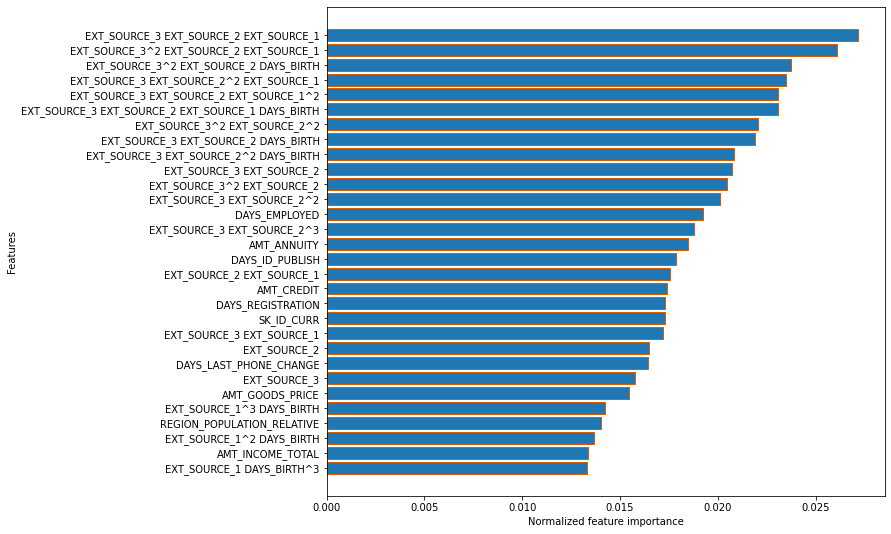

In [66]:
sorted_importance = plot_importance(feature_importance_df)

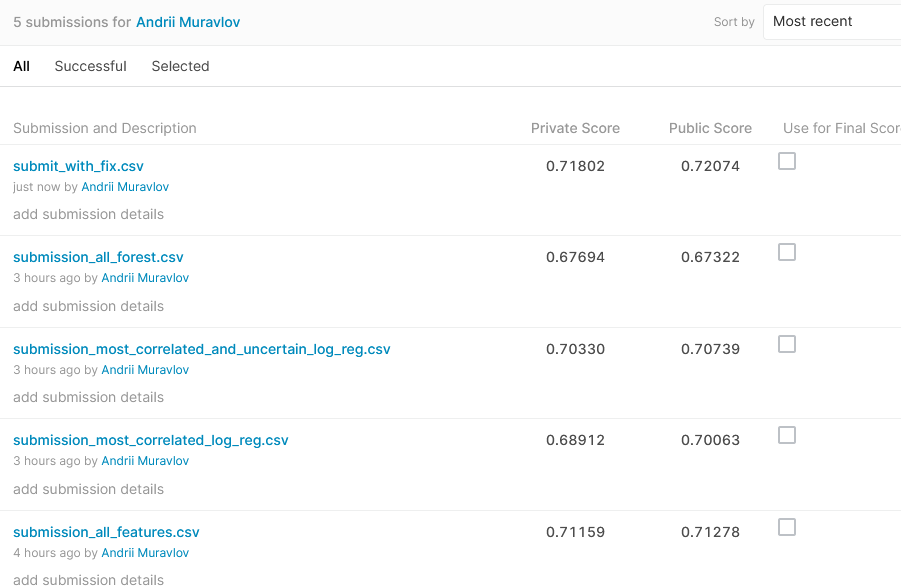

In [67]:
from IPython.display import Image
Image("picture.png")